<a href="https://colab.research.google.com/github/ReiAkio/EDA_Anime_Data_Science/blob/main/EDA_Anime_Covid_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Captura e Filtro de dados

## Import das Bibliotecas

Para essa atividade será utilizado o jikan, uma api para fazer request do site myanimelist

In [1]:
!pip install jikanpy-v4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.3 MB/s eta 0:00:00


Aqui é feito a importação de todas as bibliotecas que estão sendo utilizadas

In [2]:
from jikanpy import Jikan
from time import sleep
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import requests

## Scrapper

Declaração do Jikan

In [3]:
jikan = Jikan()

Iteração de todos os animes em todas as paginas pegando apenas os elementos necessários para análise

In [4]:
def scrape_anime_data(year, season):
        # Declaração de variaveis auxiliares
        all_anime_got = True
        page = 1
        anime_list = []

        while all_anime_got:
            
            season_data = jikan.seasons(year=year, season=season, page=page)
            anime_data = season_data['data']
            

           
            for anime in anime_data:
                title = anime['title']
                popularity = anime['popularity']
                ranked = anime['rank']
                score = anime['score']
                members = anime['members']
                genres = [genre['name'] for genre in anime['genres']]
                source = anime['source']
                studios = [studio['name'] for studio in anime['studios']]
                favorites = anime['favorites']
                

                
                anime_info = {
                'Title': title,
                'Popularity': popularity,
                'Ranked': ranked,
                'Score': score,
                'Members': members,
                'Genres': genres,
                'Source': source,
                'Studios': studios,
                'Favorites': favorites
            }

                anime_list.append(anime_info)

            page += 1
            sleep(3)

            
            if len(anime_data) <= 0:
                all_anime_got = False
        return anime_list

Para a criação desse JSON foi utilizado o REST API pois não existe as informações desse endpoint na biblioteca python.

Através do REST API, selecionado os 25 dubladores mais famosos.

In [5]:
def scrape_voice_actor_data():
    base_url = 'https://api.jikan.moe/v4/'
    endpoint = 'top/people'

    params = {
        'page': 1,    

    }

    # Fazer o request do REST API
    response = requests.get(base_url + endpoint, params=params)

    voice_actor_list=[]

    # Caso a resposta seja válida
    if response.status_code == 200:

      data = response.json()

      actors = data['data']

      for actor in actors:
                name = actor['name']
                favorite = actor['favorites']
                mal_id = actor['mal_id']

                
                voice_actor_info = {
                'Name': name,
                'Favorites': favorite,
                'Mal_Id': mal_id
            }
                # Coloca na lista os valores de voice_actor_info (objeto)
                voice_actor_list.append(voice_actor_info)

    # Caso contrário traz o print do status do erro
    else:
      print(response)

    return voice_actor_list

Traz a lista de animes que aquele dublador participou

In [6]:
def scrape_voice_data(id):
    base_url = 'https://api.jikan.moe/v4/'
    endpoint = f'people/{id}/voices'

    # Fazer o request do REST API
    response = requests.get(base_url + endpoint)

    voice_list=[]

    # Caso a resposta seja válida
    if response.status_code == 200:

      # Retrieve the data from the response
      data = response.json()

      voices = data['data']

      for voice in voices:

                title = voice['anime']['title']
                # Coloca na lista os nomes do anime
                voice_list.append(title)

    # Caso contrário traz o print do status do erro
    else:
      print(response)
    
    # sleep de 3 pois a API não suporta muitas requisições em um curto período de tempo
    sleep(3)
    return voice_list

## Pegando todos os animes de 2019 por temporadas de acordo com o site **MyAnimeList** (Maior referencia de informações de anime com dados de publico também)

Pegando todos os animes de verão de 2019 de acordo com o MyAnimeList


In [7]:
summer_2019 = scrape_anime_data(year=2019, season='summer')
print(summer_2019)

[{'Title': 'Dr. Stone', 'Popularity': 55, 'Ranked': 249, 'Score': 8.29, 'Members': 1623277, 'Genres': ['Adventure', 'Comedy', 'Sci-Fi'], 'Source': 'Manga', 'Studios': ['TMS Entertainment'], 'Favorites': 26860}, {'Title': 'Vinland Saga', 'Popularity': 87, 'Ranked': 42, 'Score': 8.74, 'Members': 1347028, 'Genres': ['Action', 'Adventure', 'Drama'], 'Source': 'Manga', 'Studios': ['Wit Studio'], 'Favorites': 41687}, {'Title': 'Enen no Shouboutai', 'Popularity': 98, 'Ranked': 1107, 'Score': 7.71, 'Members': 1246662, 'Genres': ['Action', 'Supernatural'], 'Source': 'Manga', 'Studios': ['David Production'], 'Favorites': 8896}, {'Title': 'Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka II', 'Popularity': 227, 'Ranked': 2864, 'Score': 7.23, 'Members': 772006, 'Genres': ['Action', 'Adventure', 'Fantasy'], 'Source': 'Light novel', 'Studios': ['J.C.Staff'], 'Favorites': 2027}, {'Title': 'Arifureta Shokugyou de Sekai Saikyou', 'Popularity': 291, 'Ranked': 5339, 'Score': 6.7, 'Members': 64961

Pegando todos os animes de inverno de 2019 de acordo com o MyAnimeList

In [8]:
winter_2019 = scrape_anime_data(year=2019, season='winter')

Pegando todos os animes de primavera de 2019 de acordo com o MyAnimeList

In [9]:
spring_2019 = scrape_anime_data(year=2019, season='spring')

Pegando todos os animes de outono de 2019 de acordo com o MyAnimeList

In [10]:
fall_2019 = scrape_anime_data(year=2019, season='fall')

## Pegando todos os animes de 2020 por temporadas de acordo com o site MyAnimeList (Maior referencia de informações de anime com dados de publico também)

Pegando todos os animes de verão de 2020 de acordo com o MyAnimeList

In [11]:
summer_2020 = scrape_anime_data(year=2020, season='summer')

Pegando todos os animes de inverno de 2020 de acordo com o MyAnimeList

In [12]:
winter_2020 = scrape_anime_data(year=2020, season='winter')

Pegando todos os animes de primavera de 2020 de acordo com o MyAnimeList

In [13]:
spring_2020 = scrape_anime_data(year=2020, season='spring')

Pegando todos os animes de outono de 2020 de acordo com o MyAnimeList

In [14]:
fall_2020 = scrape_anime_data(year=2020, season='fall')

## Pegando todos os animes de 2021 por temporadas de acordo com o site MyAnimeList (Maior referencia de informações de anime com dados de publico também)

Pegando todos os animes de verão de 2021 de acordo com o MyAnimeList

In [15]:
summer_2021 = scrape_anime_data(year=2021, season='summer')

Pegando todos os animes de inverno de 2021 de acordo com o MyAnimeList

In [16]:
winter_2021 = scrape_anime_data(year=2021, season='winter')

Pegando todos os animes de primavera de 2021 de acordo com o MyAnimeList

In [17]:
spring_2021 = scrape_anime_data(year=2021, season='spring')

Pegando todos os animes de outono de 2021 de acordo com o MyAnimeList

In [18]:
fall_2021 = scrape_anime_data(year=2021, season='fall')

## Pegando todos os animes de 2022 por temporadas de acordo com o site MyAnimeList (Maior referencia de informações de anime com dados de publico também)

Pegando todos os animes de verão de 2022 de acordo com o MyAnimeList

In [19]:
summer_2022 = scrape_anime_data(year=2022, season='summer')

Pegando todos os animes de inverno de 2022 de acordo com o MyAnimeList

In [20]:
winter_2022 = scrape_anime_data(year=2022, season='winter')

Pegando todos os animes de primavera de 2022 de acordo com o MyAnimeList

In [21]:
spring_2022 = scrape_anime_data(year=2022, season='spring')

Pegando todos os animes de outono de 2022 de acordo com o MyAnimeList

In [22]:
fall_2022 = scrape_anime_data(year=2022, season='fall')

## Pegando os 25 dubladores mais famosos de acordo com o site MyAnimeList (Maior referencia de informações de anime com dados de publico também)

In [23]:
voice_actors = scrape_voice_actor_data()
print(voice_actors)

[{'Name': 'Hiroshi Kamiya', 'Favorites': 105827, 'Mal_Id': 118}, {'Name': 'Kana Hanazawa', 'Favorites': 100518, 'Mal_Id': 185}, {'Name': 'Mamoru Miyano', 'Favorites': 89460, 'Mal_Id': 65}, {'Name': 'Yuuki Kaji', 'Favorites': 73783, 'Mal_Id': 672}, {'Name': 'Hayao Miyazaki', 'Favorites': 68802, 'Mal_Id': 1870}, {'Name': 'Saori Hayami', 'Favorites': 61801, 'Mal_Id': 869}, {'Name': 'Rie Takahashi', 'Favorites': 53393, 'Mal_Id': 34785}, {'Name': 'Eiichiro Oda', 'Favorites': 50751, 'Mal_Id': 1881}, {'Name': 'Daisuke Ono', 'Favorites': 48290, 'Mal_Id': 212}, {'Name': 'Tomokazu Sugita', 'Favorites': 46172, 'Mal_Id': 2}, {'Name': 'Nobuhiko Okamoto', 'Favorites': 44190, 'Mal_Id': 270}, {'Name': 'Hirohiko Araki', 'Favorites': 41441, 'Mal_Id': 2619}, {'Name': 'Rie Kugimiya', 'Favorites': 40317, 'Mal_Id': 8}, {'Name': 'Yoshitsugu Matsuoka', 'Favorites': 39984, 'Mal_Id': 11817}, {'Name': 'Miyuki Sawashiro', 'Favorites': 39907, 'Mal_Id': 99}, {'Name': 'Kenjirou Tsuda', 'Favorites': 38522, 'Mal_Id': 

## Junção por ano

Para muitas análises, será utilizado uma junção de todos os animes que tiveram naquele ano, e como a api não fornece um método para conseguirmos estes dados, foi feito a junção de todos os animes em todas as estações dos anos (verão, primavera, outono e inverno) para a obtenção desta informação

Juntando todos os animes de 2019

In [24]:
anime_2019 = summer_2019 + winter_2019 + spring_2019 + fall_2019
print(anime_2019)

[{'Title': 'Dr. Stone', 'Popularity': 55, 'Ranked': 249, 'Score': 8.29, 'Members': 1623277, 'Genres': ['Adventure', 'Comedy', 'Sci-Fi'], 'Source': 'Manga', 'Studios': ['TMS Entertainment'], 'Favorites': 26860}, {'Title': 'Vinland Saga', 'Popularity': 87, 'Ranked': 42, 'Score': 8.74, 'Members': 1347028, 'Genres': ['Action', 'Adventure', 'Drama'], 'Source': 'Manga', 'Studios': ['Wit Studio'], 'Favorites': 41687}, {'Title': 'Enen no Shouboutai', 'Popularity': 98, 'Ranked': 1107, 'Score': 7.71, 'Members': 1246662, 'Genres': ['Action', 'Supernatural'], 'Source': 'Manga', 'Studios': ['David Production'], 'Favorites': 8896}, {'Title': 'Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka II', 'Popularity': 227, 'Ranked': 2864, 'Score': 7.23, 'Members': 772006, 'Genres': ['Action', 'Adventure', 'Fantasy'], 'Source': 'Light novel', 'Studios': ['J.C.Staff'], 'Favorites': 2027}, {'Title': 'Arifureta Shokugyou de Sekai Saikyou', 'Popularity': 291, 'Ranked': 5339, 'Score': 6.7, 'Members': 64961

Juntando todos os animes de 2020

In [25]:
anime_2020 = summer_2020 + winter_2020 + spring_2020 + fall_2020
print(anime_2020)

[{'Title': 'Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season', 'Popularity': 134, 'Ranked': 212, 'Score': 8.34, 'Members': 1039203, 'Genres': ['Drama', 'Fantasy', 'Suspense'], 'Source': 'Light novel', 'Studios': ['White Fox'], 'Favorites': 11332}, {'Title': 'Kanojo, Okarishimasu', 'Popularity': 160, 'Ranked': 3682, 'Score': 7.07, 'Members': 918254, 'Genres': ['Comedy', 'Romance'], 'Source': 'Manga', 'Studios': ['TMS Entertainment'], 'Favorites': 8101}, {'Title': 'The God of High School', 'Popularity': 184, 'Ranked': 3683, 'Score': 7.07, 'Members': 856613, 'Genres': ['Action', 'Fantasy'], 'Source': 'Web manga', 'Studios': ['MAPPA'], 'Favorites': 4034}, {'Title': 'Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e Kayou', 'Popularity': 242, 'Ranked': 2157, 'Score': 7.38, 'Members': 732160, 'Genres': ['Action', 'Fantasy'], 'Source': 'Light novel', 'Studios': ['SILVER LINK.'], 'Favorites': 5653}, {'Title': 'Enen no Shouboutai: Ni no Shou', '

Juntando todos os animes de 2021

In [26]:
anime_2021 = summer_2021 + winter_2021 + spring_2021 + fall_2021
print(anime_2021)

[{'Title': 'Tensei shitara Slime Datta Ken 2nd Season Part 2', 'Popularity': 276, 'Ranked': 223, 'Score': 8.33, 'Members': 677744, 'Genres': ['Action', 'Adventure', 'Comedy', 'Fantasy'], 'Source': 'Manga', 'Studios': ['8bit'], 'Favorites': 10430}, {'Title': 'Kobayashi-san Chi no Maid Dragon S', 'Popularity': 392, 'Ranked': 241, 'Score': 8.3, 'Members': 518145, 'Genres': ['Fantasy', 'Slice of Life'], 'Source': 'Manga', 'Studios': ['Kyoto Animation'], 'Favorites': 5759}, {'Title': 'Vanitas no Karte', 'Popularity': 421, 'Ranked': 715, 'Score': 7.91, 'Members': 481137, 'Genres': ['Action', 'Fantasy', 'Mystery'], 'Source': 'Manga', 'Studios': ['Bones'], 'Favorites': 6801}, {'Title': 'Tsuki ga Michibiku Isekai Douchuu', 'Popularity': 597, 'Ranked': 1119, 'Score': 7.71, 'Members': 364153, 'Genres': ['Action', 'Adventure', 'Comedy', 'Fantasy'], 'Source': 'Light novel', 'Studios': ['C2C'], 'Favorites': 3588}, {'Title': 'Genjitsu Shugi Yuusha no Oukoku Saikenki', 'Popularity': 615, 'Ranked': 284

Juntando todos os animes de 2022

In [27]:
anime_2022 = summer_2022 + winter_2022 + spring_2022 + fall_2022
print(anime_2022)

[{'Title': 'Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e 2nd Season', 'Popularity': 398, 'Ranked': 424, 'Score': 8.14, 'Members': 512577, 'Genres': ['Drama', 'Suspense'], 'Source': 'Light novel', 'Studios': ['Lerche'], 'Favorites': 7396}, {'Title': 'Yofukashi no Uta', 'Popularity': 405, 'Ranked': 578, 'Score': 8.01, 'Members': 505534, 'Genres': ['Romance', 'Supernatural'], 'Source': 'Manga', 'Studios': ['LIDENFILMS'], 'Favorites': 6594}, {'Title': 'Overlord IV', 'Popularity': 452, 'Ranked': 473, 'Score': 8.09, 'Members': 457019, 'Genres': ['Action', 'Adventure', 'Fantasy'], 'Source': 'Light novel', 'Studios': ['Madhouse'], 'Favorites': 6643}, {'Title': 'Hataraku Maou-sama!!', 'Popularity': 475, 'Ranked': 5503, 'Score': 6.67, 'Members': 435886, 'Genres': ['Comedy', 'Fantasy'], 'Source': 'Light novel', 'Studios': ['Studio 3Hz'], 'Favorites': 4799}, {'Title': 'Lycoris Recoil', 'Popularity': 508, 'Ranked': 343, 'Score': 8.2, 'Members': 416586, 'Genres': ['Action'], 'Source': 'Original',

## Transformando as listas de json obtidas em DataFrame

Criando o DataFrame de anime para cada ano, e no caso de dubladores, um DataFrame específico para tal.



In [28]:
df_anime_2019 = pd.DataFrame(anime_2019)
df_anime_2020 = pd.DataFrame(anime_2020)
df_anime_2021 = pd.DataFrame(anime_2021)
df_anime_2022 = pd.DataFrame(anime_2022)
df_voice_actors = pd.DataFrame(voice_actors)


Unificando os os dicionarios de Json para um unico Dataframe, com a adição de cada ano em sua coluna

In [73]:
year_dicts = [
    {'Year': 2019, 'Data': anime_2019},
    {'Year': 2020, 'Data': anime_2020},
    {'Year': 2021, 'Data': anime_2021},
    {'Year': 2022, 'Data': anime_2022}
]

combined_data = []

for year_dict in year_dicts:
    year = year_dict['Year']
    anime_data = year_dict['Data']
    for entry in anime_data:
        entry['Year'] = year
        combined_data.append(entry) 

df_all_anime = pd.DataFrame(combined_data)

df_all_anime

,Title,Popularity,Ranked,Score,Members,Genres,Source,Studios,Favorites,Year
0,Dr. Stone,55,249.0,8.29,1623277,"[Adventure, Comedy, Sci-Fi]",Manga,[TMS Entertainment],26860,2019
1,Vinland Saga,87,42.0,8.74,1347028,"[Action, Adventure, Drama]",Manga,[Wit Studio],41687,2019
2,Enen no Shouboutai,98,1107.0,7.71,1246662,"[Action, Supernatural]",Manga,[David Production],8896,2019
3,Dungeon ni Deai wo Motomeru no wa Machigatteir...,227,2864.0,7.23,772006,"[Action, Adventure, Fantasy]",Light novel,[J.C.Staff],2027,2019
4,Arifureta Shokugyou de Sekai Saikyou,291,5339.0,6.70,649615,"[Action, Adventure, Fantasy]",Light novel,"[asread., White Fox]",6141,2019
...,...,...,...,...,...,...,...,...,...,...
860,Punirunes,15514,18945.0,NaN,434,"[Fantasy, Slice of Life]",Original,[OLM Digital],3,2022
861,Sylvanian Families: Freya no Happy Diary,16808,20072.0,NaN,329,[Slice of Life],Other,[LandQ studios],0,2022
862,Chickip Dancers 2nd Season,16946,15176.0,NaN,318,[Slice of Life],Other,[Fanworks],2,2022
863,Obake Zukan!,16952,18568.0,NaN,318,"[Comedy, Fantasy, Supernatural]",Picture book,[Fanworks],0,2022


# Análise do tema

## Numero de membros ao longo dos anos

Foi feita a criação de um gráfico de barras para analisar o sucesso de um anime (sucesso para esta aplicação será considerado a quantidade de membros existentes em cada anime, ou seja, quantas pessoas viram o determinado anime) pelo genêro dos mesmos.

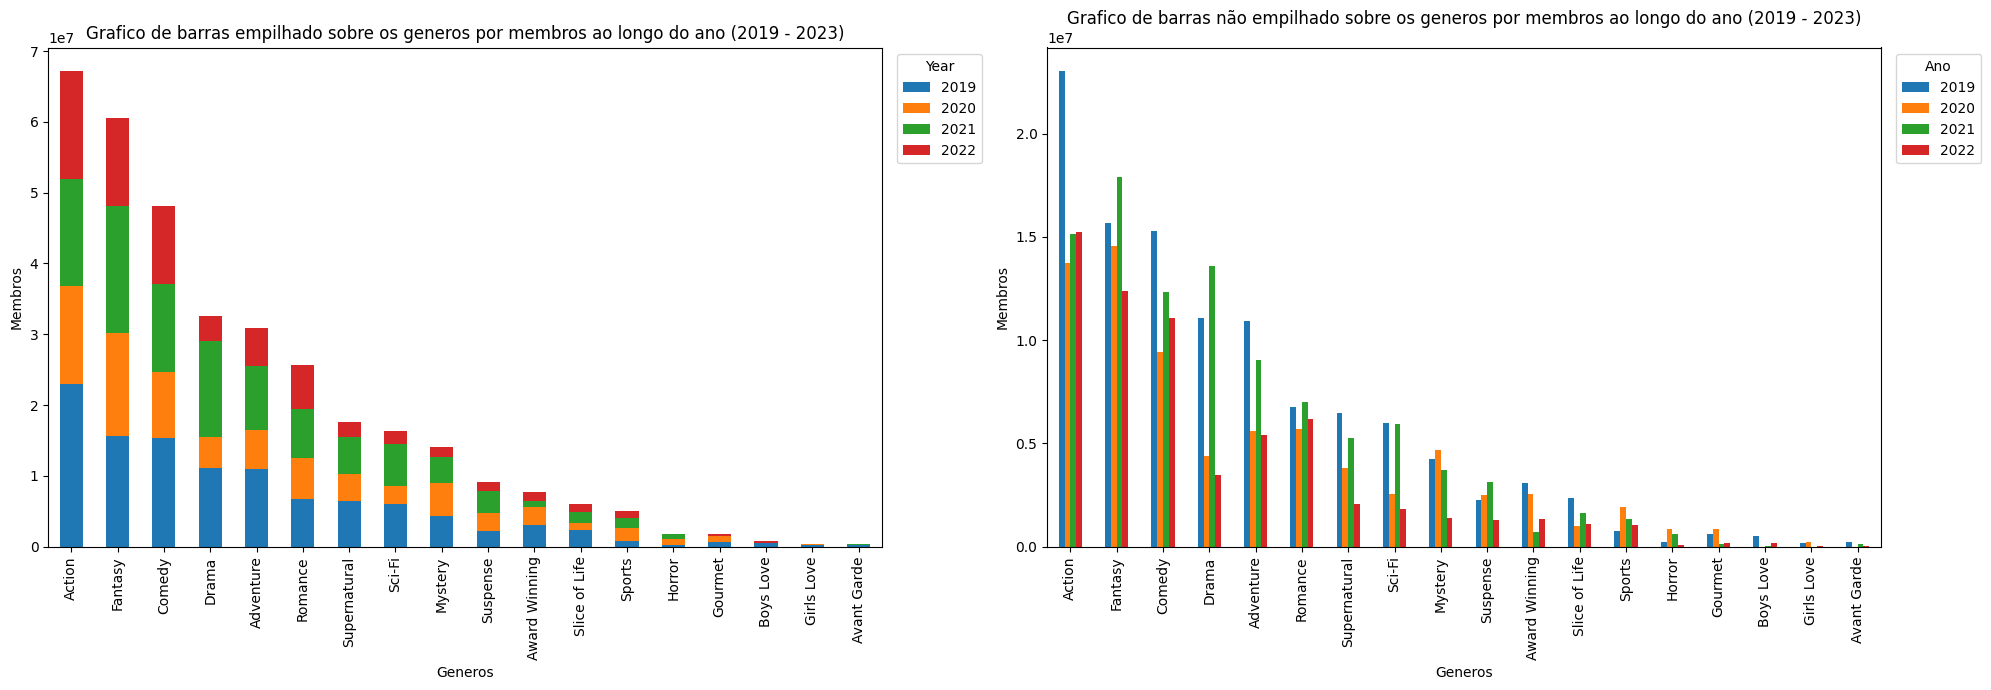

In [51]:
import matplotlib.pyplot as plt

df_all_anime_expanded = df_all_anime.explode('Genres')

pivot_df = df_all_anime_expanded.pivot_table(index='Genres', columns='Year', values='Members', aggfunc='sum', fill_value=0)

pivot_df['Total'] = pivot_df.sum(axis=1)

genres_to_remove = ['Erotica', 'Ecchi']
pivot_df = pivot_df[~pivot_df.index.isin(genres_to_remove)]

pivot_df = pivot_df.sort_values('Total', ascending=False)

pivot_df = pivot_df.drop('Total', axis=1)

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

# Plot the stacked bar chart on the first subplot
pivot_df.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_xlabel('Generos')
axs[0].set_ylabel('Membros')
axs[0].set_title('Grafico de barras empilhado sobre os generos por membros ao longo do ano (2019 - 2023)')
axs[0].legend(title='Year', bbox_to_anchor=(1.01, 1), loc='upper left')

# Plot the non-stacked bar chart on the second subplot
pivot_df.plot(kind='bar', stacked=False, ax=axs[1])
axs[1].set_xlabel('Generos')
axs[1].set_ylabel('Membros')
axs[1].set_title('Grafico de barras não empilhado sobre os generos por membros ao longo do ano (2019 - 2023)')
axs[1].legend(title='Ano', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout()
plt.show()


Analisando os gráficos é possível perceber que de forma geral, os genêros ação, fantasia e comédia permanecem no top 3 de forma constante. Assim, pode-se afirmar, de acordo com a análise, que o publico no geral prefere animes desses genêros. Também é possível concluir que os anos de 2019 e 2021 foram os que obtiveram maiores taxas de visualizações (membros).

## Numero de animes lançados por generos ao longo dos anos analisados

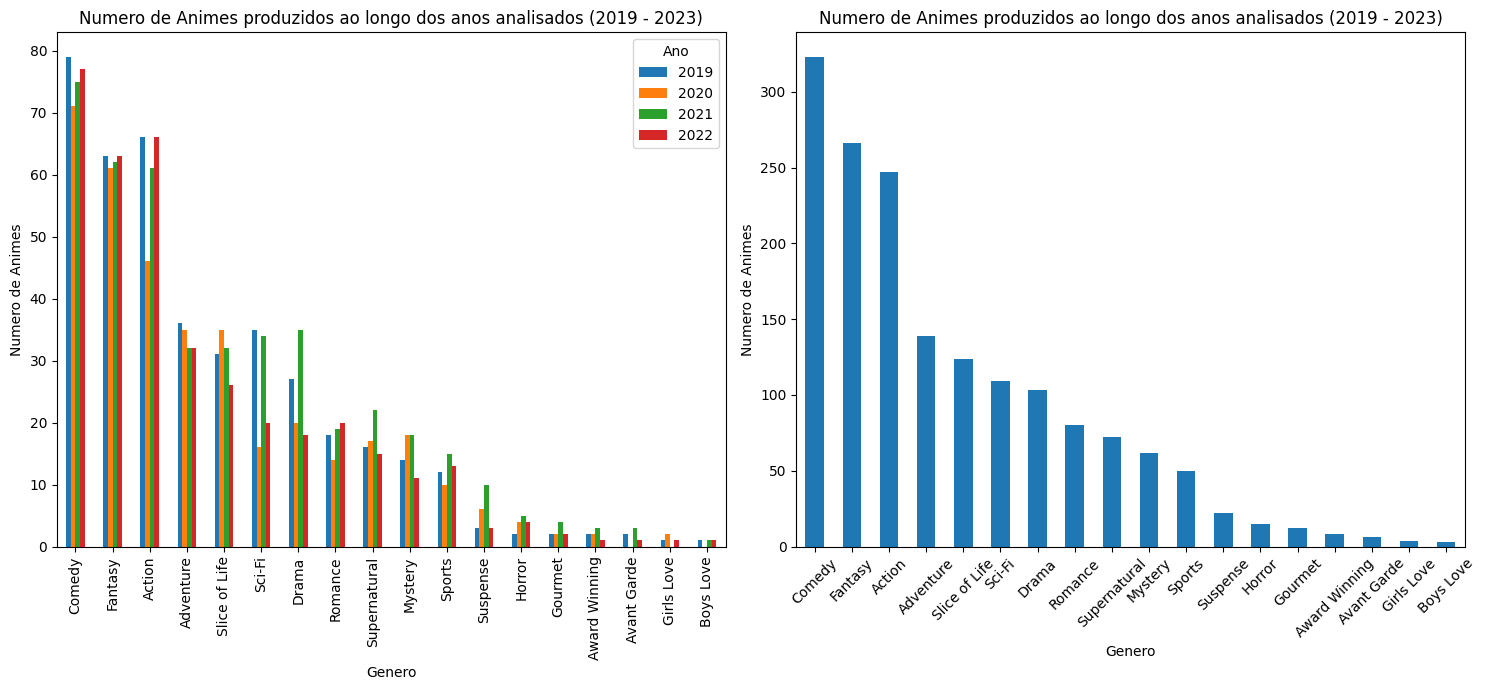

In [63]:
df_all_anime_expanded = df_all_anime[df_all_anime['Genres'].apply(lambda x: 'Ecchi' not in x and 'Erotica' not in x)].explode('Genres')
genre_year_counts = df_all_anime_expanded.groupby(['Genres', 'Year']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

genre_year_counts_sum = genre_year_counts.sum(axis=1)
genre_year_counts_sorted = genre_year_counts_sum.sort_values(ascending=False)
genre_year_counts = genre_year_counts.reindex(genre_year_counts_sorted.index)

genre_year_counts.plot(kind='bar', stacked=False, ax=ax[0])
ax[0].set_xlabel('Genero')
ax[0].set_ylabel('Numero de Animes')
ax[0].set_title('Numero de Animes produzidos ao longo dos anos analisados (2019 - 2023)')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].legend(title='Ano')

genres_df_all_anime = df_all_anime['Genres'].explode()
genre_counts = genres_df_all_anime[~genres_df_all_anime.isin(['Ecchi', 'Erotica'])].value_counts()

genre_counts.plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('Genero')
ax[1].set_ylabel('Numero de Animes')
ax[1].set_title('Numero de Animes produzidos ao longo dos anos analisados (2019 - 2023)')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


Analisando o gráfico, percebe-se que manteve-se o top 3 anterior: Comédia, Fantasia e Ação. É de interesse notar que o número de animes produzidos ao longo desses anos acompanha de forma aproximada a quantidade de membros que estes animes possuiram, ou seja, quantas pessoas realmente estão vendo cada genêro. Porém diferente da análise por membros, percebe-se que houve um número muito maior de animes com comédia do que os que realmente foram assistidos. Também é possível notar que diferente da análise por membros, quando se analisa a produção em sí, há uma discrepância muito maior do top 3 para a quarta posição.

## Qual é fonte do material original dos animes que mais fazem sucesso atualmente

No mundo das animações japonesas, é de conhecimento comum que as animações normalmente são feitas com base em uma fonte, esta podendo ser manga (quadrinhos japoneses), light novel (tipo de livro pequeno muito popular no Japão), etc. Porém existem também muitas adaptações que não possuem uma fonte, e a essas, é dado o nome de material original. Está análise busca entender como as fontes para as animações se relacionam com os animes mais visualizados. 

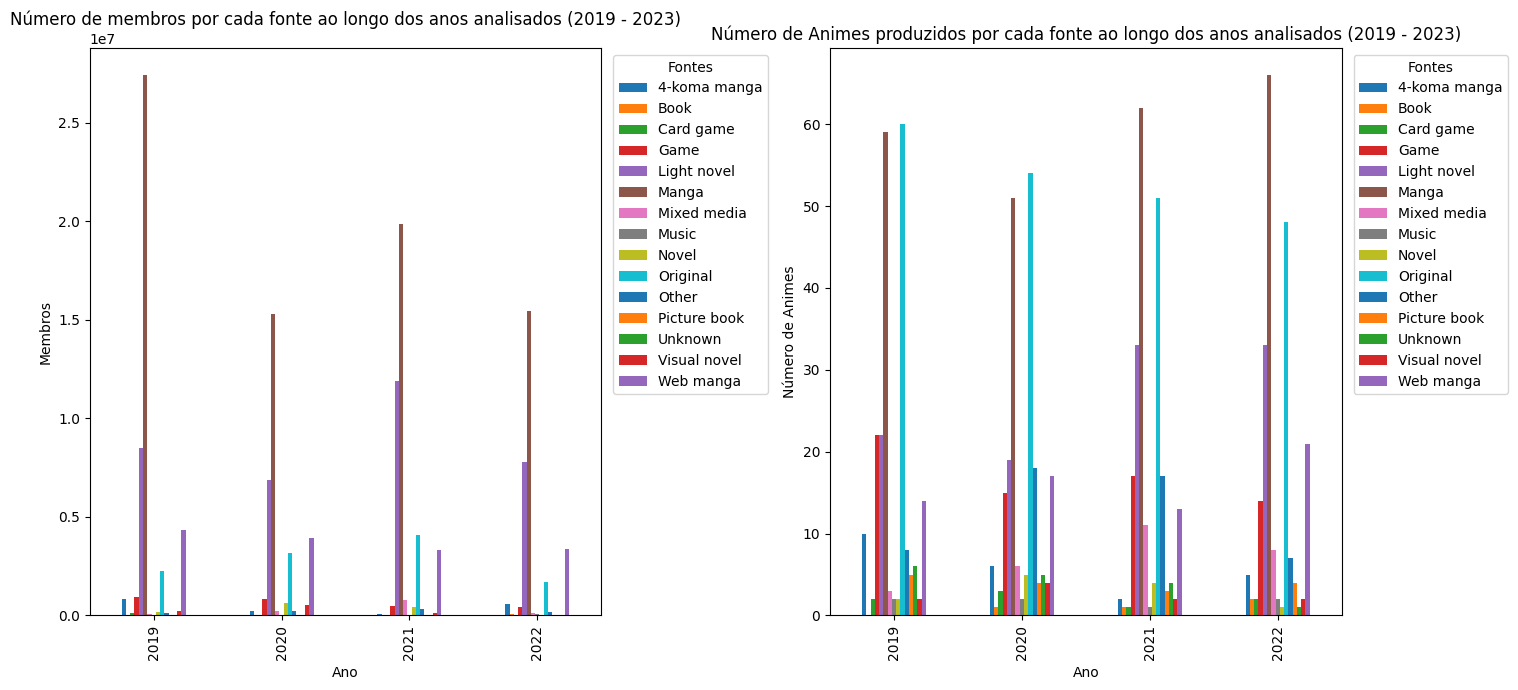

In [83]:
source_year_counts = df_all_anime.groupby(['Year', 'Source']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

pivot_df.plot(kind='bar', ax=ax[0])
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Membros')
ax[0].set_title('Número de membros por cada fonte ao longo dos anos analisados (2019 - 2023)')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].legend(title='Fontes', bbox_to_anchor=(1.01, 1), loc='upper left')

source_year_counts.plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Número de Animes')
ax[1].set_title('Número de Animes produzidos por cada fonte ao longo dos anos analisados (2019 - 2023)')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].legend(title='Fontes', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout()
plt.show()


Ao analisar ambos os gráficos sobre o material original, percebe-se uma recepção e produção de animes muito mais bem vinda de mangas (quadrinhos japoneses), enquanto as outras fontes de material original não foram bem sucedidas em ambas as categorias. É nítido uma produção de animes vindos de um de um jogo, e de material original (criação de um enredo para a produção do anime) muito superior do que a recepção do público. Esta análise pode ter como conclusão de que talvez não seja de maior interesse investir tanto em materiais originais e em animações advindas de jogos.

## Quantos animes os maiores studio produziram ao longo dos anos?

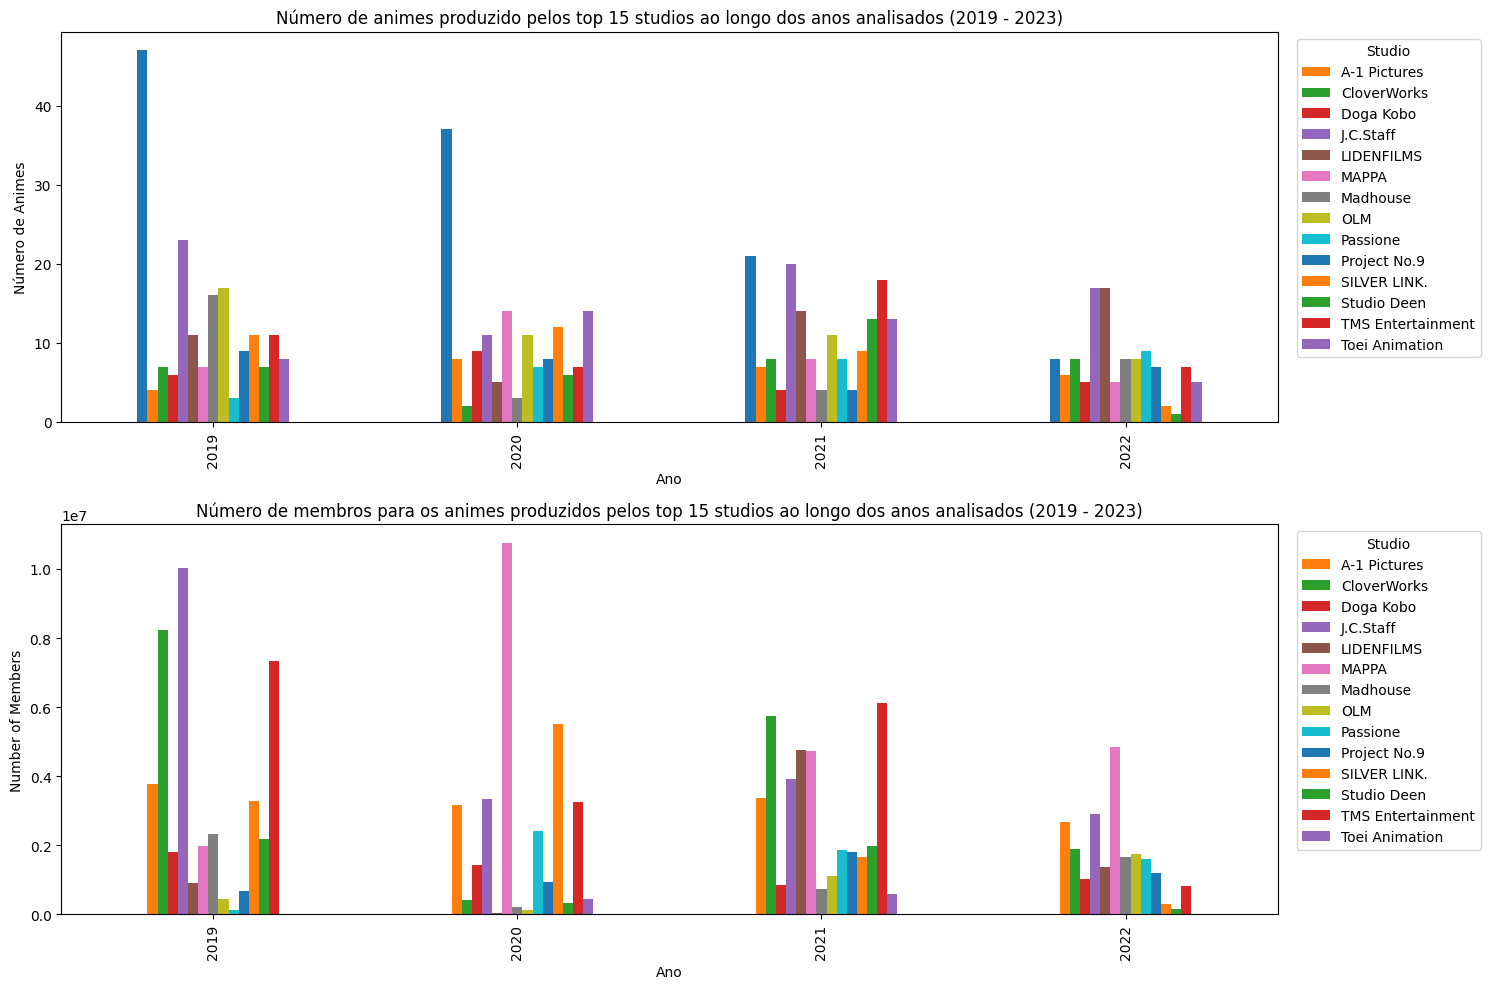

In [93]:
# Explode the 'Genres' column to separate rows
df_genres_exploded = df_all_anime.explode('Genres')

# Create a new column 'Studio' by converting the list of studios into a string
df_genres_exploded['Studio'] = df_genres_exploded['Studios'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Group the DataFrame by 'Year' and 'Studio' and count the number of animes and members
grouped = df_genres_exploded.groupby(['Year', 'Studio']).agg({'Title': 'count', 'Members': 'sum'}).reset_index()

# Get the top 15 studios based on the total number of animes
top_studios = grouped.groupby('Studio')['Title'].sum().nlargest(15).index

# Filter the DataFrame to include only the top 15 studios
grouped_filtered = grouped[grouped['Studio'].isin(top_studios)]

# Pivot the filtered DataFrame to create pivot tables for animes and members
pivot_df_animes = grouped_filtered.pivot(index='Year', columns='Studio', values='Title')
pivot_df_members = grouped_filtered.pivot(index='Year', columns='Studio', values='Members')

# Plot the pivot table for animes as a bar plot
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

pivot_df_animes.plot(kind='bar', ax=ax[0])
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Número de Animes')
ax[0].set_title('Número de animes produzido pelos top 15 studios ao longo dos anos analisados (2019 - 2023)')
ax[0].legend(title='Studio', bbox_to_anchor=(1.01, 1), loc='upper left')

# Plot the pivot table for members as a bar plot
pivot_df_members.plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Number of Members')
ax[1].set_title('Número de membros para os animes produzidos pelos top 15 studios ao longo dos anos analisados (2019 - 2023)')
ax[1].legend(title='Studio', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout()
plt.show()


Ao comparar ambos os gráficos, podemos perceber que a quantidade de animes que cada um dos studios fazem não está proporcionalmente constante com relação ao número de membros, ou seja, os studios produzirem muitos animes ou não, pouco interferem em sua recepção para com o público. Pode-se perceber entretanto, alguns casos notáveis, o studio Project No.9 por exemplo, começou fazendo vários animes, porém com uma recepção ruim do público, acabou tendo esta quantidade diminuída, fato que não aconteceu com o studio J.C.Staff, que manteve uma quantidade de animes produzidos moderada, e mesmo que, em 2019 tenha feito extremo sucesso, manteve em seus anos conseguintes uma recepção mediana.

## Qual a relação das analises anteriores com os animes mais famosos

A Popularity (popularidade) é um parâmetro que calcula o score por número de membros e atribui um ranking para ela, ou seja, quanto menor for a Popularity, maior será o número de pessoas que gostam desse anime, enquanto o score é o ranking a média de todas as pessoas que avaliaram aquele anime.

Para essa análise, foi usado o parâmetro Popularity para comparar com as análises anteriores

In [36]:
# TOP 5 animes mais populares
df_top_anime = df_all_anime.loc[df_all_anime.Favorites.nlargest(5).index]
df_top_anime

,Title,Popularity,Ranked,Score,Members,Genres,Source,Studios,Favorites,Year
97,Kimetsu no Yaiba,7,121.0,8.51,2795797,"[Action, Award Winning, Fantasy]",Manga,[ufotable],88046,2019
367,Jujutsu Kaisen,17,68.0,8.64,2241032,"[Action, Award Winning, Fantasy]",Manga,[MAPPA],80910,2020
98,Shingeki no Kyojin Season 3 Part 2,24,4.0,9.06,2095109,"[Action, Drama]",Manga,[Wit Studio],55122,2019
466,Shingeki no Kyojin: The Final Season,41,33.0,8.80,1838605,"[Action, Drama]",Manga,[MAPPA],51356,2021
1,Vinland Saga,87,42.0,8.74,1347028,"[Action, Adventure, Drama]",Manga,[Wit Studio],41687,2019


De acordo com o gráfico de gênero, os gêneros mais famosos são: action (ação), fantasy (fantasia) e comedy (comédia). E, tendo em vista o gráfico de source (origem) dos animes os mais famosos tem como fonte de origem o mangá.

Analisando de acordo com o top 5, todos os animes tem ação como o gênero, que é considerado o mais famoso comparado com as análises anteriores. O gênero de fantasia aparece nas duas primeiras ocorrências, sendo o segundo gênero mais famoso, e o gênero de drama nas três últimas, o qual não está entre os mais famosos.

Todos os 5 animes tem como source mangá. Essa análise mostra que a maioria dos animes mais famosos entre os anos de 2019-2022 tem como origem o mangá.

## Qual a relação da popularidade dos dubladores com os animes mais famosos

Selecionando os 5 animes com mais popularidade

In [37]:
df_all_anime.loc[df_all_anime.Favorites.nlargest(5).index]

,Title,Popularity,Ranked,Score,Members,Genres,Source,Studios,Favorites,Year
97,Kimetsu no Yaiba,7,121.0,8.51,2795797,"[Action, Award Winning, Fantasy]",Manga,[ufotable],88046,2019
367,Jujutsu Kaisen,17,68.0,8.64,2241032,"[Action, Award Winning, Fantasy]",Manga,[MAPPA],80910,2020
98,Shingeki no Kyojin Season 3 Part 2,24,4.0,9.06,2095109,"[Action, Drama]",Manga,[Wit Studio],55122,2019
466,Shingeki no Kyojin: The Final Season,41,33.0,8.80,1838605,"[Action, Drama]",Manga,[MAPPA],51356,2021
1,Vinland Saga,87,42.0,8.74,1347028,"[Action, Adventure, Drama]",Manga,[Wit Studio],41687,2019


## Qual a relação da popularidade dos dubladores com os animes mais famosos

Dublador é uma carreira bem valorizada no Japão, sendo que muitas vezes, o dinheiro investido em dubladores é bem maior que nos próprios desenvolvedores do anime. E, com isso, é desejado saber a influência de um dublador famoso na popularidade de um anime

In [38]:
df_top_voice_actors = df_voice_actors.loc[df_voice_actors.Favorites.nlargest(5).index]# Criar a coluna 'Animes' que retorna a lista de animes que cada 25 dubladores participaram 
df_voice_actors['Animes'] = df_voice_actors['Mal_Id'].apply(scrape_voice_data)

Aqui é feito um filtro, caso o site não fornecer a lista de anime que o dublador participou, tirar do DataFrame (Já ordenado por Favorites). No caso foram tirado 2 dubladores

Favorites é um parâmetro que conta quantas pessoas adicionaram aquele dublador na lista de favorito, somente pode ter um número limitado de favorito por usuário

In [39]:
df_voice_actors = df_voice_actors[df_voice_actors['Animes'].map(lambda x: len(x) > 0)]
df_voice_actors

,Name,Favorites,Mal_Id,Animes
0,Hiroshi Kamiya,105827,118,"[Urusei Yatsura (2022) 2nd Season, Osomatsu-sa..."
1,Kana Hanazawa,100518,185,"[Urusei Yatsura (2022) 2nd Season, Dekoboko Ma..."
2,Mamoru Miyano,89460,65,"[Urusei Yatsura (2022) 2nd Season, Bungou Stra..."
3,Yuuki Kaji,73783,672,"[Rabbits Kingdom the Movie, Bungou Stray Dogs ..."
4,Hayao Miyazaki,68802,1870,"[Mei to Koneko Bus, Mei to Koneko Bus]"
5,Saori Hayami,61801,869,"[Urusei Yatsura (2022) 2nd Season, Komada Jour..."
6,Rie Takahashi,53393,34785,"[Urusei Yatsura (2022) 2nd Season, Kanojo mo K..."
7,Eiichiro Oda,50751,1881,[One Piece: Yume no Soccer Ou!]
8,Daisuke Ono,48290,212,[Osomatsu-san: Tamashii no Takoyaki Party to D...
9,Tomokazu Sugita,46172,2,[Kage no Jitsuryokusha ni Naritakute! 2nd Seas...


Aqui é feito uma contagem de quantos animes cada dublador participou.

Após isso vai ser criado um gráfico que foi inserido em conjunto com outros 2 gráficos

In [40]:
famous_anime_voice_list = []
# Para cada anime na lista, contado e adicionado em uma nova coluna Anime_Count
df_voice_actors['Anime_Count'] = df_voice_actors['Animes'].apply(lambda x: len(x))
# Classificado com o maior número de anime que um dublador fez
df_voice_actors = df_voice_actors.sort_values('Anime_Count', ascending=False)
print(df_voice_actors)

                   Name  Favorites  Mal_Id  \
17      Takehito Koyasu      33191     160   
24     Takahiro Sakurai      24576      79   
12         Rie Kugimiya      40317       8   
14     Miyuki Sawashiro      39907      99   
9       Tomokazu Sugita      46172       2   
16         Jun Fukuyama      34989      86   
1         Kana Hanazawa     100518     185   
21       Junichi Suwabe      25937      95   
19     Yuuichi Nakamura      30417     513   
3            Yuuki Kaji      73783     672   
8           Daisuke Ono      48290     212   
0        Hiroshi Kamiya     105827     118   
20            Aoi Yuuki      30291    6686   
23            Ai Kayano      25445   10765   
5          Saori Hayami      61801     869   
10     Nobuhiko Okamoto      44190     270   
2         Mamoru Miyano      89460      65   
13  Yoshitsugu Matsuoka      39984   11817   
15       Kenjirou Tsuda      38522     591   
6         Rie Takahashi      53393   34785   
4        Hayao Miyazaki      68802

<ipython-input-40-9c40c8d32bf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voice_actors['Anime_Count'] = df_voice_actors['Animes'].apply(lambda x: len(x))


Aqui é criado um novo DataFrame comparando o TOP 5 animes mais populares e os dubladores mais famosos. Caso algum dos animes do TOP 5 estiver na lista de animes, o código vai criar um novo DataFrame, mostrando o nome, os animes em comum e a quantidade.

Após isso vai ser criado um gráfico para uma melhor visualização (O gráfico será criado em conjunto com 2 gráficos)

In [41]:
famous_anime_voice_list = []
# Para cada lista de anime e nome de dublador
for voice,name in zip(df_voice_actors['Animes'],df_voice_actors['Name']):
  aux=[]
  # Para cada anime na lista de anime dos dubladores
  for voice_anime in voice:
    # Para cada anime na lista de TOP 5
    for anime in df_top_anime['Title']:
        # Se o anime do TOP 5 for igual ao anime que o dublador atuou
        if voice_anime == anime:
          # adiciona na lista
          aux.append(voice_anime)
  famous_anime_voice_info = {
              'Name': name,
              'Anime': aux,
              'Count': len(aux)
          }
  # FILTRO: caso tenha uma lista vazia desconsiderar 
  if(len(famous_anime_voice_info['Anime']) > 0):
    famous_anime_voice_list.append(famous_anime_voice_info)

#Criação do DF
df_famous_anime_voice_list = pd.DataFrame(famous_anime_voice_list)
print(df_famous_anime_voice_list)

                   Name                                              Anime  \
0       Takehito Koyasu  [Shingeki no Kyojin: The Final Season, Shingek...   
1      Takahiro Sakurai                 [Jujutsu Kaisen, Kimetsu no Yaiba]   
2          Rie Kugimiya                                   [Jujutsu Kaisen]   
3       Tomokazu Sugita  [Shingeki no Kyojin Season 3 Part 2, Kimetsu n...   
4          Jun Fukuyama                                 [Kimetsu no Yaiba]   
5         Kana Hanazawa                                 [Kimetsu no Yaiba]   
6        Junichi Suwabe                 [Jujutsu Kaisen, Kimetsu no Yaiba]   
7      Yuuichi Nakamura                                   [Jujutsu Kaisen]   
8            Yuuki Kaji  [Shingeki no Kyojin: The Final Season, Shingek...   
9           Daisuke Ono               [Shingeki no Kyojin Season 3 Part 2]   
10       Hiroshi Kamiya  [Shingeki no Kyojin: The Final Season, Shingek...   
11            Aoi Yuuki                                 [Kimetsu

Aqui é criado os três gráficos ditos anteriormente:

*   O Primeiro representa, por ordem crescente, os dubladores mais famosos
*   O Segundo representa em ordem crescente de quantidade, os dubladores que fizeram mais participações em animes
*   O Terceiro faz uma análise para saber quais dubladores e quantos animes participou do TOP 5.

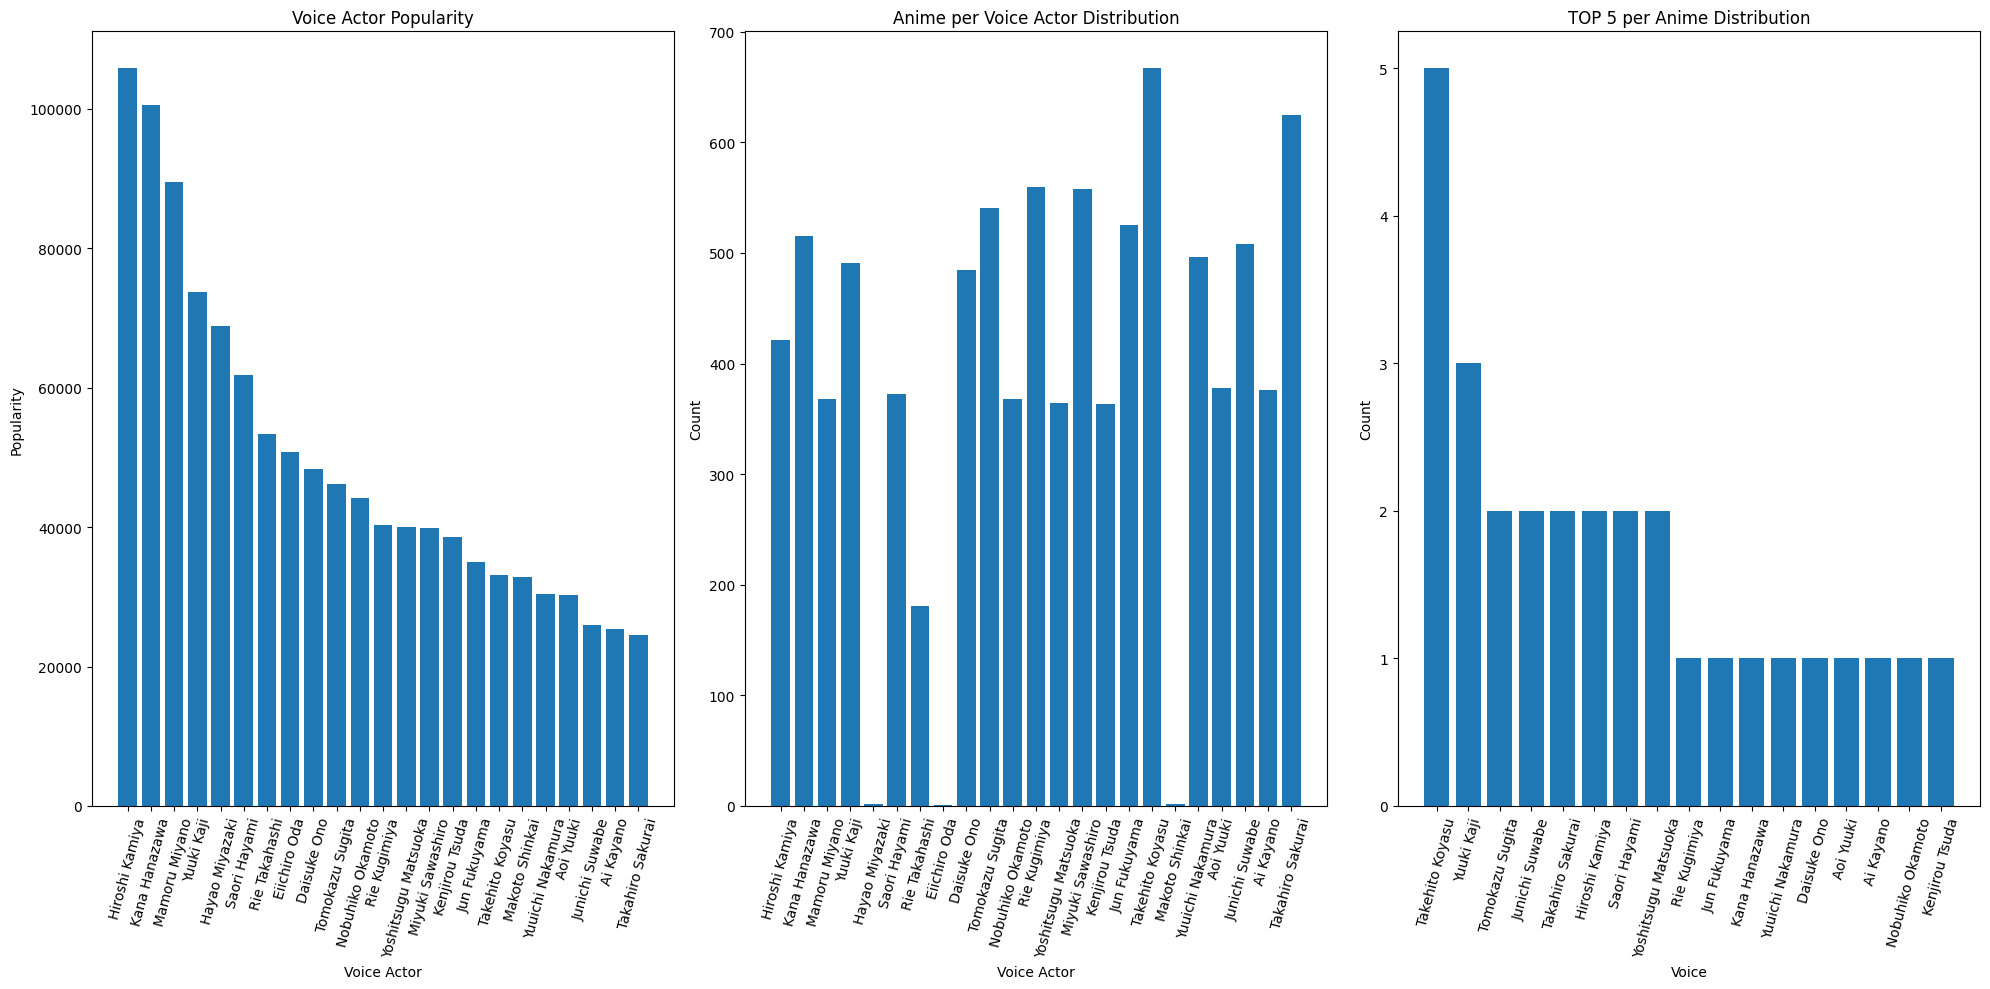

In [42]:
fig = plt.figure(figsize=(20, 10))

# Primeiro gráfico
df_voice_actors = df_voice_actors.sort_values('Favorites', ascending=False)
ax1 = fig.add_subplot(1, 3, 1)
ax1.bar(df_voice_actors['Name'], df_voice_actors['Favorites'])
ax1.set_xlabel('Voice Actor')
ax1.set_ylabel('Popularity')
ax1.set_title('Voice Actor Popularity')
ax1.set_xticks(range(len(df_voice_actors)))
ax1.set_xticklabels(df_voice_actors['Name'],rotation=75)

# Segundo gráfico
ax2 = fig.add_subplot(1, 3, 2)
ax2.bar(df_voice_actors['Name'], df_voice_actors['Anime_Count'])
ax2.set_xlabel('Voice Actor')
ax2.set_ylabel('Count')
ax2.set_title('Anime per Voice Actor Distribution')
ax2.set_xticks(range(len(df_voice_actors)))
ax2.set_xticklabels(df_voice_actors['Name'],rotation=75)

# Terceiro gráfico
df_famous_anime_voice_list = df_famous_anime_voice_list.sort_values('Count', ascending=False)
ax3 = fig.add_subplot(1, 3, 3)
ax3.bar(df_famous_anime_voice_list['Name'], df_famous_anime_voice_list['Count'])
ax3.set_xlabel('Voice')
ax3.set_ylabel('Count')
ax3.set_title('TOP 5 per Anime Distribution')
ax3.set_xticks(range(len(df_famous_anime_voice_list)))
ax3.set_xticklabels(df_famous_anime_voice_list['Name'],rotation=75)

fig.tight_layout()

plt.show()

Assim podemos concluir que, a quantidade de anime que o dublador participou não está diretamente relacionada com a popularidade do dublador. Mas, dos 25 dubladores analisados, 19 (76%) dublou um personagem do TOP 25 animes mais famosos. Com essa análise, pode se perceber que grande parte dos dubladores mais famosos dublaram um personagem de um anime famoso. Então para as obras mais famosas, pode ser que a empresa decidiu contratar um dublador famoso para, assim, trazer mais fama para o anime.

O Top 3 dubladores mais famosos é o Hiroshi Kamiya, Kana Hanazawa e Mamoru Miyano, porém os dubladores que mais participaram de animes são Jun Fukuyama e Takahiro Sakurai. Além disso os dubladores que mais fizeram papéis do TOP 5 animes mais famosos são Takehito Koyasu e Yuuki Kaji

## Covid-19

Criação do dataset com o filtro para

In [43]:
import pandas as pd

# Read the CSV file into a pandas DataFrame, specifying the delimiter as a semicolon
df = pd.read_csv('https://raw.githubusercontent.com/ReiAkio/EDA_Anime_Data_Science/main/acaps_covid19_government_measures_dataset_0.csv', delimiter=';')

# Filter the DataFrame for records with the exact "lockdown" category
df_lockdown = df[df['CATEGORY'].str.lower().eq('lockdown')]

# Print the resulting DataFrame
df_lockdown.head()



,ID,ISO,COUNTRY,REGION,ADMIN_LEVEL_NAME,PCODE,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
42,4276,AFG,Afghanistan,Asia,Kabul,NaN,Introduction / extension of measures,Lockdown,Partial lockdown,checked,The Afghan Ministries of Public Health and Int...,NaN,28/03/2020,US Embassy,Government,https://af.usembassy.gov/message-for-u-s-citiz...,07/04/2020,NaN
100,3740,ALB,Albania,Europe,NaN,NaN,Introduction / extension of measures,Lockdown,Partial lockdown,NaN,"All restricitive measures (curfew, public serv...",Not applicable,02/04/2020,Intenational SOS,Other organisations,https://pandemic.internationalsos.com/2019-nco...,03/04/2020,NaN
102,5351,ALB,Albania,Europe,NaN,NaN,Introduction / extension of measures,Lockdown,Partial lockdown,NaN,Modified (from original 16hour curfew on 23/3/...,Up to detention,13/04/2020,International SOS,Other organisations,https://pandemic.internationalsos.com/2019-nco...,15/04/2020,https://balkaninsight.com/2020/04/10/rights-or...
162,1982,DZA,Algeria,Africa,Bilda,NaN,Introduction / extension of measures,Lockdown,Full lockdown,checked,Bilda (complete confinement - all movement in ...,Not available,23/03/2020,Gardaworld,Other organisations,https://www.garda.com/crisis24/news-alerts/325...,24/03/2020,NaN
166,7998,DZA,Algeria,Africa,Algiers,NaN,Introduction / extension of measures,Lockdown,Partial lockdown,checked,resident Abdelmadjid Tebboune announced a part...,Not available,23/03/2020,GardaWorld,Media,https://www.garda.com/crisis24/news-alerts/325...,28/04/2020,NaN


Grafico de analise do inicio do decreto de lockdown nos países

<ipython-input-44-333ece390601>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_lockdown['DATE_IMPLEMENTED'] = pd.to_datetime(df_lockdown['DATE_IMPLEMENTED'])
<ipython-input-44-333ece390601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lockdown['DATE_IMPLEMENTED'] = pd.to_datetime(df_lockdown['DATE_IMPLEMENTED'])


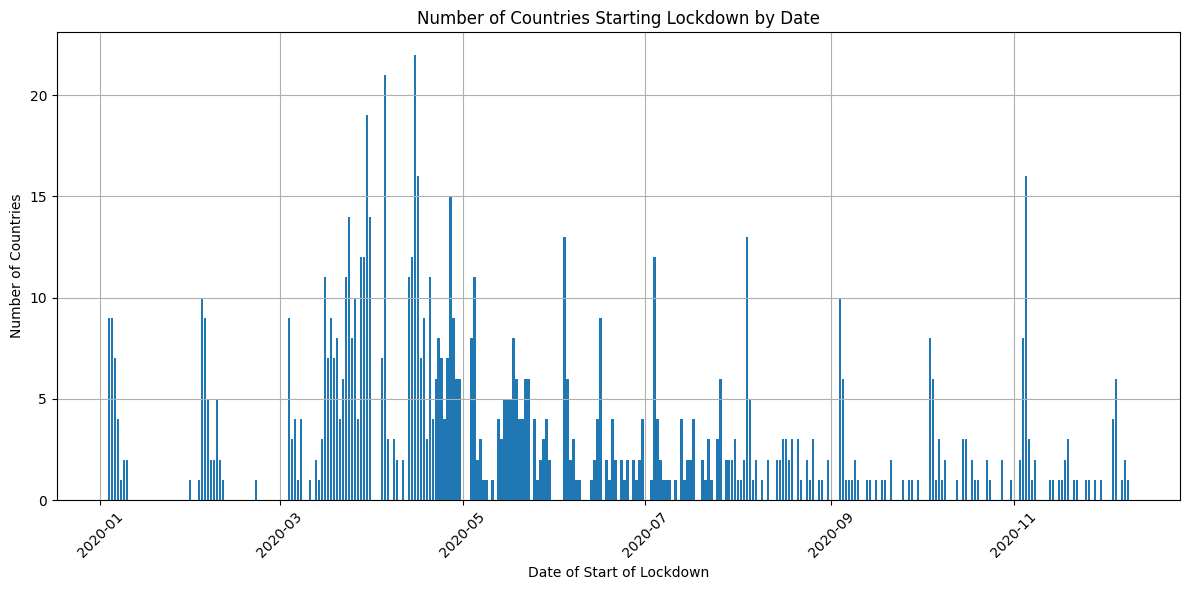

In [44]:
# Convert the 'DATE_IMPLEMENTED' column to datetime format
df_lockdown['DATE_IMPLEMENTED'] = pd.to_datetime(df_lockdown['DATE_IMPLEMENTED'])

# Group the DataFrame by the 'DATE_IMPLEMENTED' column and count the number of countries for each date
grouped_df = df_lockdown.groupby('DATE_IMPLEMENTED')['COUNTRY'].count().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the number of countries that started the lockdown on each date as a bar plot
plt.bar(grouped_df['DATE_IMPLEMENTED'], grouped_df['COUNTRY'], width=0.8)

# Customize the plot
plt.xlabel('Date of Start of Lockdown')
plt.ylabel('Number of Countries')
plt.title('Number of Countries Starting Lockdown by Date')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

Japao


<ipython-input-45-017d7fa794e2>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_japan_measures['DATE_IMPLEMENTED'] = pd.to_datetime(df_japan_measures['DATE_IMPLEMENTED'])
<ipython-input-45-017d7fa794e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_japan_measures['DATE_IMPLEMENTED'] = pd.to_datetime(df_japan_measures['DATE_IMPLEMENTED'])


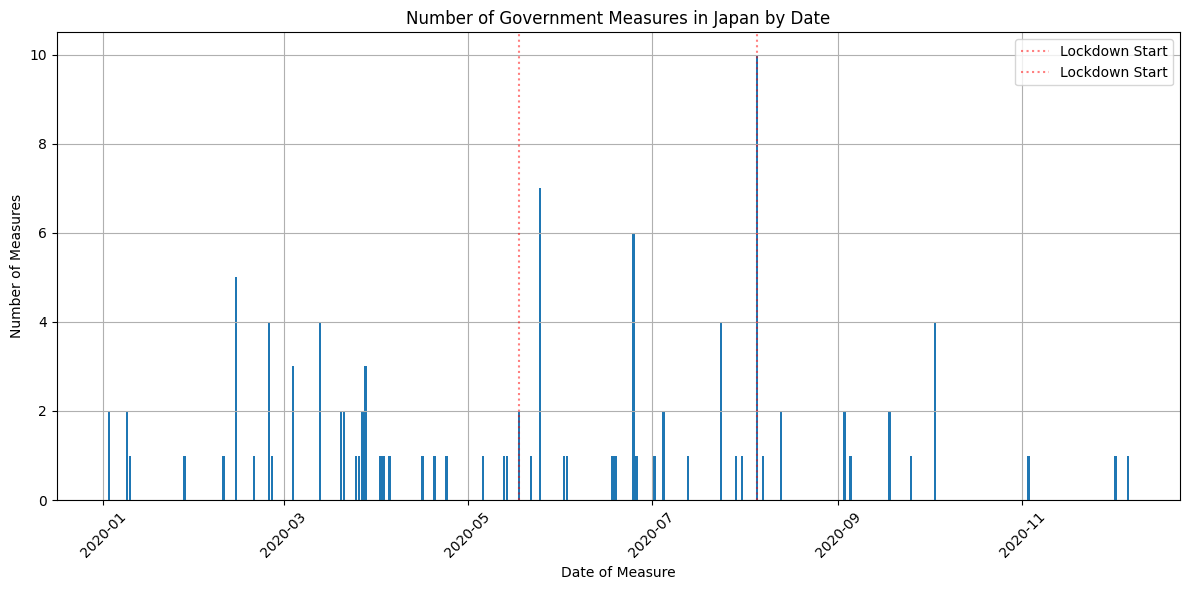

In [45]:
# Filter the DataFrame for records with Japan as the country
df_japan_measures = df[df['COUNTRY'] == 'Japan']

# Convert the 'DATE_IMPLEMENTED' column to datetime format
df_japan_measures['DATE_IMPLEMENTED'] = pd.to_datetime(df_japan_measures['DATE_IMPLEMENTED'])

# Group the DataFrame by the 'DATE_IMPLEMENTED' column and count the number of measures for each date
grouped_df_japan = df_japan_measures.groupby('DATE_IMPLEMENTED').size().reset_index(name='Count')

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the number of measures in Japan on each date as a bar plot
plt.bar(grouped_df_japan['DATE_IMPLEMENTED'], grouped_df_japan['Count'], width=0.8)

# Customize the plot
plt.xlabel('Date of Measure')
plt.ylabel('Number of Measures')
plt.title('Number of Government Measures in Japan by Date')
plt.xticks(rotation=45)
plt.grid(True)

# Add vertical lines for the lockdown categories
lockdown_categories = ['lockdown', 'quarantine', 'isolation']
for category in lockdown_categories:
    lockdown_dates = df_japan_measures[df_japan_measures['CATEGORY'].str.lower() == category]['DATE_IMPLEMENTED']
    for lockdown_date in lockdown_dates:
        plt.axvline(lockdown_date, color='r', linestyle=':', alpha=0.5, label=f'{category.capitalize()} Start')

# Display the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Foi realizada uma análise sobre as medidas de combate a covid-19 do Japão, tendo as linhas em tracejado vermelho decisões de lockdown. A escolha do Japão como país a ser analisado, se da, por ser o principal país em questão de produção e venda de animes do mundo, e assim, analisar impactos externos como o da Covid-19 se torna fundamental para entender alguns parâmetros dos gráficos ja apresentados. Um fato importante a ser mencionado, é a quantidade massiva de medidas ao combate a pandemia que o país enfrentou.

# Conclusão

Ao comparar o gráfico de lockdown da Covid-19 com os gráficos dos gêneros mais populares ao longo dos anos, dos animes produzidos pelos estúdios e do material original dos animes lançados, podemos observar algumas tendências interessantes.

Primeiramente, identificamos que os três gêneros mais populares ao longo dos anos são "action", "fantasy" e "comedy". Esses gêneros continuaram consistentes no topo, demonstrando uma preferência duradoura do público por esses tipos de animes. Isso se percebe na análise do TOP 5 animes mais famosos, o qual demonstra que todos os animes tem o gênero action.

Após isso, identificamos que o source (origem) mais popular ao longo dos anos é o mangá. Isso se percebe na análise do TOP 5 animes mais famosos, o qual demonstra que todos os animes tem mangá como source

No entanto, é notável que houve uma redução na quantidade de animes produzidos na maioria dos gêneros, bem como no número geral de animes lançados. Isso pode ser atribuído principalmente às políticas de combate à Covid-19 implementadas pelo Japão ao longo de 2020, incluindo medidas de lockdown e estabelecimento de um isolamento social rigoroso. Como resultado, vários estúdios tiveram que diminuir sua produtividade ou interromper temporariamente suas atividades até se estabilizarem.

É interessante observar que houve uma recuperação gradual dessa queda a partir de 2019, especialmente no ano de 2021. Isso pode indicar que os estúdios conseguiram se adaptar às novas circunstâncias e retomar suas atividades de forma progressiva.

Essa análise ressalta a influência significativa da pandemia da Covid-19 na indústria de animes no Japão. As medidas de lockdown e isolamento social afetaram a produção e o lançamento de animes, resultando em uma redução geral na quantidade de animes produzidos e lançados, mas também mostrando sinais de recuperação ao longo do tempo.

A maioria dos dubladores mais famosos participaram na dublagem de pelo menos um anime do top 5, então o elenco pode ser escolhido através da fama de um dublador.
